In [12]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
conn = sqlite3.connect('../data/sakila.db')

In [14]:
df = pd.read_sql(
    '''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id = customer.customer_id
    INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
    INNER JOIN store ON inventory.store_id = store.store_id
    INNER JOIN address ON store.address_id = address.address_id
    INNER JOIN city ON address.city_id = city.city_id
    INNER JOIN film ON inventory.film_id = film.film_id
    ;
    ''',
    conn, index_col='rental_id', parse_dates=['rental_date', 'return_date']
)

In [15]:
df.head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [17]:
df.describe

<bound method NDFrame.describe of                   rental_date         return_date customer_lastname  store_id  \
rental_id                                                                       
1         2005-05-24 22:53:30 2005-05-26 22:04:30            HUNTER         1   
2         2005-05-24 22:54:33 2005-05-28 19:40:33           COLLAZO         2   
3         2005-05-24 23:03:39 2005-06-01 22:12:39           MURRELL         2   
4         2005-05-24 23:04:41 2005-06-03 01:43:41             PURDY         1   
5         2005-05-24 23:05:21 2005-06-02 04:33:21            HANSEN         2   
...                       ...                 ...               ...       ...   
16045     2005-08-23 22:25:26 2005-08-25 23:54:26             WHITE         1   
16046     2005-08-23 22:26:47 2005-08-27 18:02:47             KELLY         2   
16047     2005-08-23 22:42:48 2005-08-25 02:48:48             ELLIS         2   
16048     2005-08-23 22:43:07 2005-08-31 21:33:07          HAMILTON        

In [18]:
df.isna().sum()

rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [19]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [20]:
df.film_rental_duration.mean()

4.935489902767389

<AxesSubplot:>

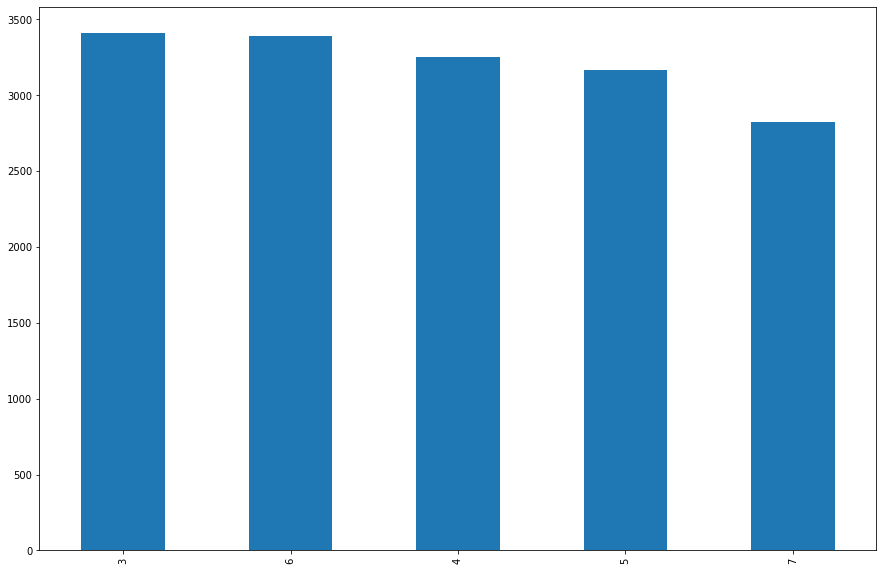

In [21]:
# what is the most common rental duration?
df.film_rental_duration.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='film_rental_duration', ylabel='film_rental_duration'>

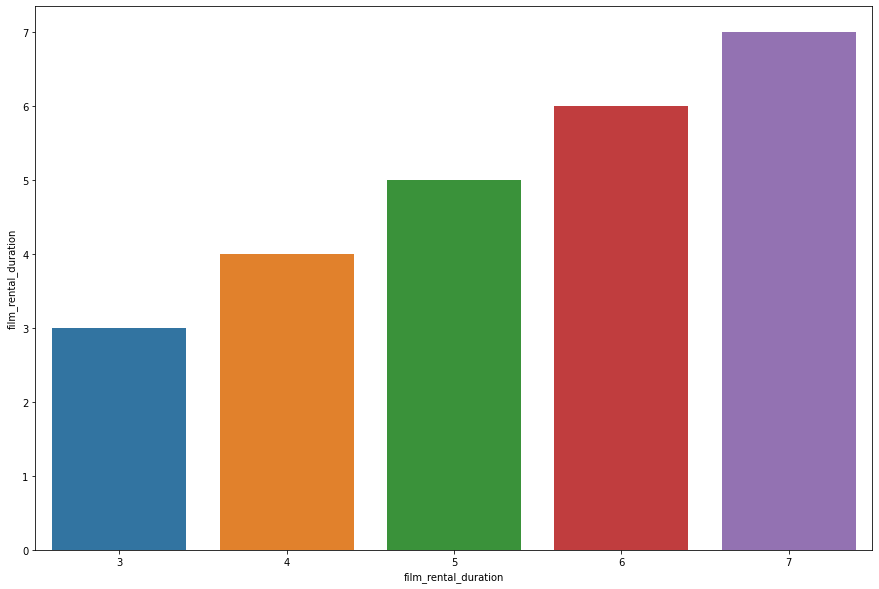

In [25]:
sns.barplot(x='film_rental_duration', y='film_rental_duration', data=df)

In [26]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [28]:
# what is the most common rental rate?
df.film_rental_rate.mean()

2.9426302667663933

<AxesSubplot:ylabel='film_rental_rate'>

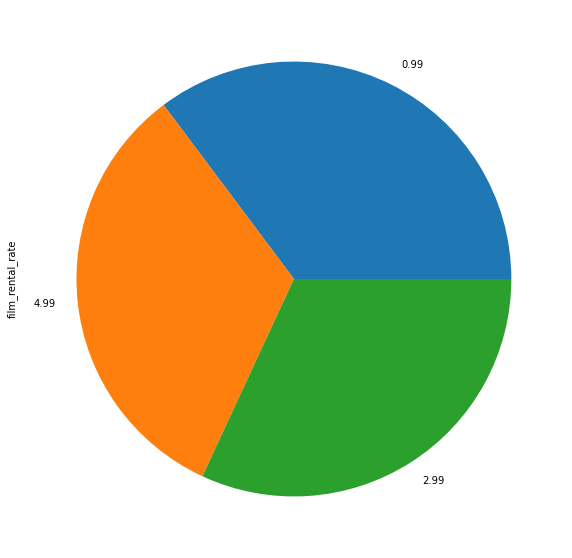

In [30]:
df.film_rental_rate.value_counts().plot(kind='pie')

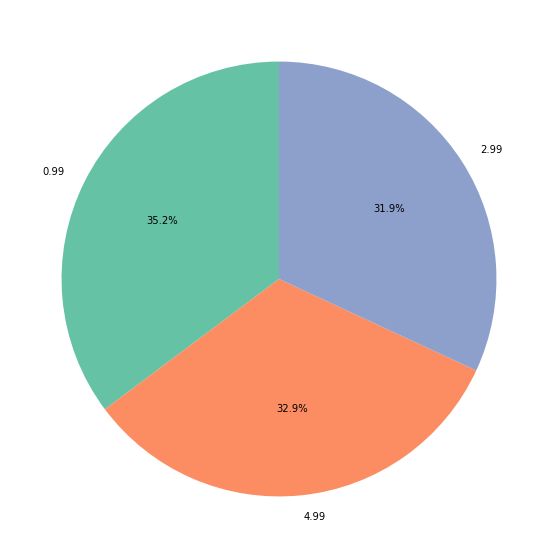

In [32]:
colors = sns.color_palette('Set2', n_colors=3)
plt.pie(df.film_rental_rate.value_counts(),
        labels=df.film_rental_rate.value_counts().index,
        colors=colors, autopct='%1.1f%%', startangle=90
)
plt.show()

<AxesSubplot:>

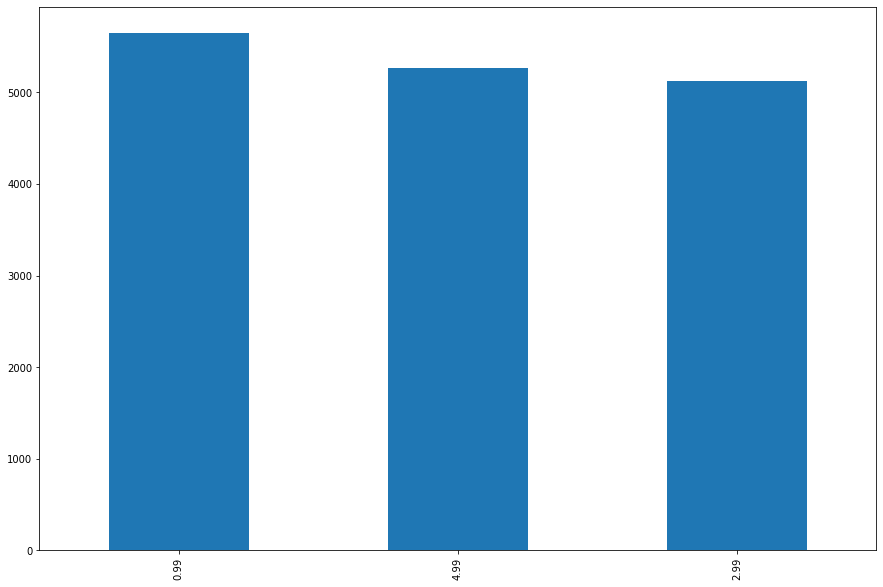

In [31]:
df.film_rental_rate.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='film_rental_rate'>

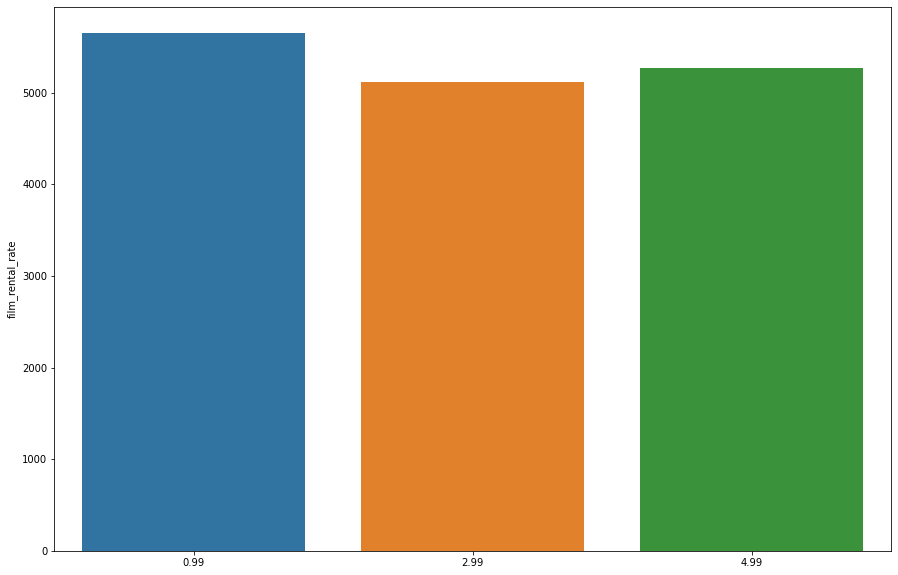

In [35]:
sns.barplot(x=df.film_rental_rate.value_counts().index, y=df.film_rental_rate.value_counts(), data=df)